# Quantitative Assessment of Stock Price Prediction Models

# Collect data

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # plots & visualize data 
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

In [5]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 10, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

# AAPL = yf.download('AAPL', start, end)
# GOOG = yf.download('GOOG', start, end)
# MSFT = yf.download('MSFT', start, end)
# AMZN = yf.download('AMZN', start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0) 
df.tail(10)

# Save the DataFrame to Excel
df.to_excel("tech_stocks_data_10y.xlsx")

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [6]:
# Read the Excel file into a DataFrame
df = pd.read_excel('tech_stocks_data_10y.xlsx')

In [7]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
10062,2024-04-11,186.740005,189.770004,185.509995,189.050003,189.050003,40020700,AMAZON
10063,2024-04-12,187.720001,188.380005,185.080002,186.130005,186.130005,38554300,AMAZON
10064,2024-04-15,187.429993,188.690002,183.000000,183.619995,183.619995,48052400,AMAZON
10065,2024-04-16,183.270004,184.830002,182.259995,183.320007,183.320007,32891300,AMAZON
10066,2024-04-17,184.309998,184.570007,179.820007,181.279999,181.279999,31359700,AMAZON
10067,2024-04-18,181.470001,182.389999,178.649994,179.220001,179.220001,30723800,AMAZON
10068,2024-04-19,178.740005,179.000000,173.440002,174.630005,174.630005,55950000,AMAZON
10069,2024-04-22,176.940002,178.869995,174.559998,177.229996,177.229996,37924900,AMAZON
10070,2024-04-23,178.080002,179.929993,175.979996,179.539993,179.539993,37046500,AMAZON
10071,2024-04-24,179.940002,180.320007,176.179993,176.589996,176.589996,34010800,AMAZON


## Check the size of the spreadsheet

In [8]:
# Check the Index
print(df.index)

# Check Time Differences
time_differences = df.index[1:] - df.index[:-1]

RangeIndex(start=0, stop=10072, step=1)


In [9]:
time_differences

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
           dtype='int64', length=10071)

# Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [10]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2518.000000,2518.000000,2518.000000,2518.000000,2518.000000,2.518000e+03
mean,82.827727,83.716832,81.990358,82.893761,80.930449,1.291423e+08
std,57.834920,58.461723,57.248587,57.885716,58.397797,7.635727e+07
min,20.161785,20.357143,20.026072,20.277500,17.860733,2.404830e+07
25%,31.687500,31.893125,31.430625,31.655625,28.466243,7.768720e+07
50%,51.456249,51.938749,50.962500,51.623751,49.555025,1.084118e+08
75%,142.699997,144.329998,140.844994,142.769997,141.181335,1.582043e+08
max,198.020004,199.619995,197.000000,198.110001,197.857529,7.599116e+08


## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [11]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2014-04-24 to 2024-04-24
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2518 non-null   float64
 1   High          2518 non-null   float64
 2   Low           2518 non-null   float64
 3   Close         2518 non-null   float64
 4   Adj Close     2518 non-null   float64
 5   Volume        2518 non-null   int64  
 6   company_name  2518 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 157.4+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

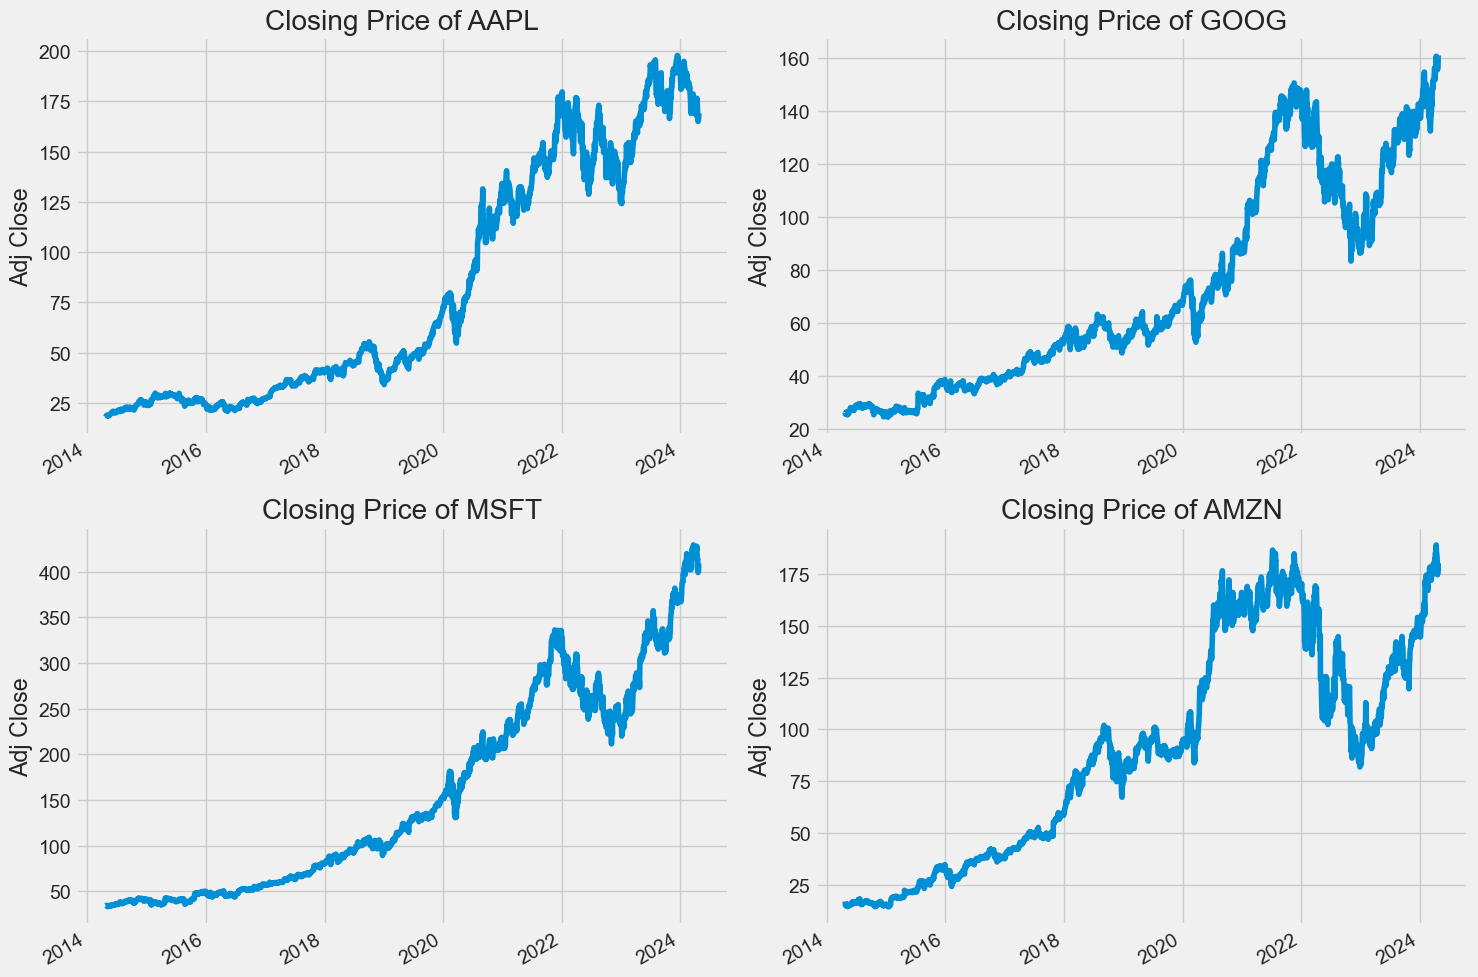

In [12]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

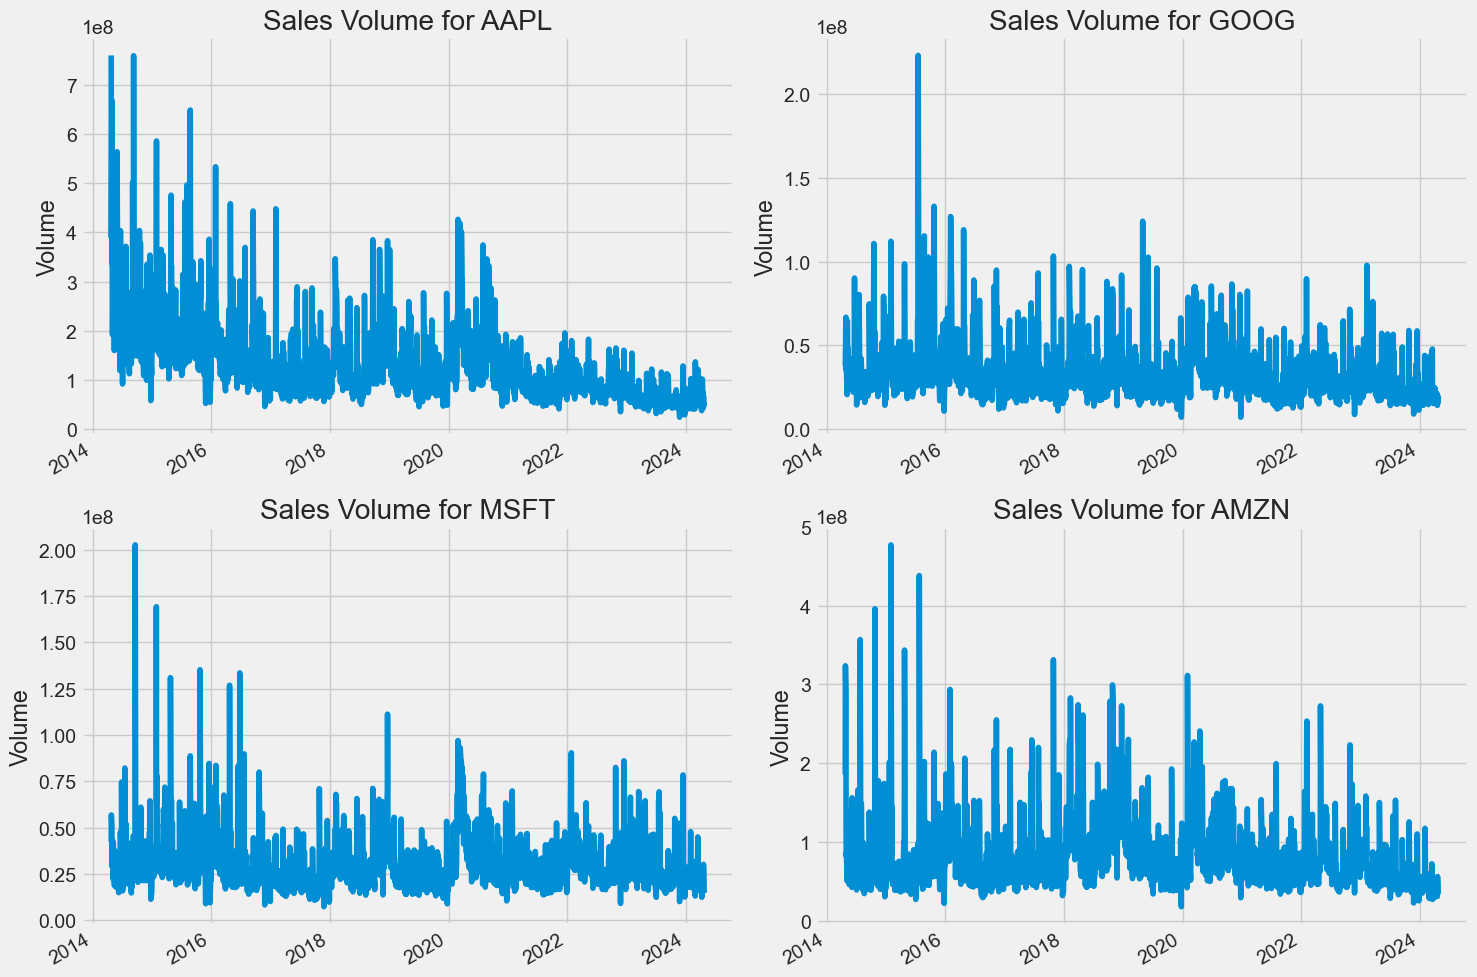

In [13]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

# Moving average

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

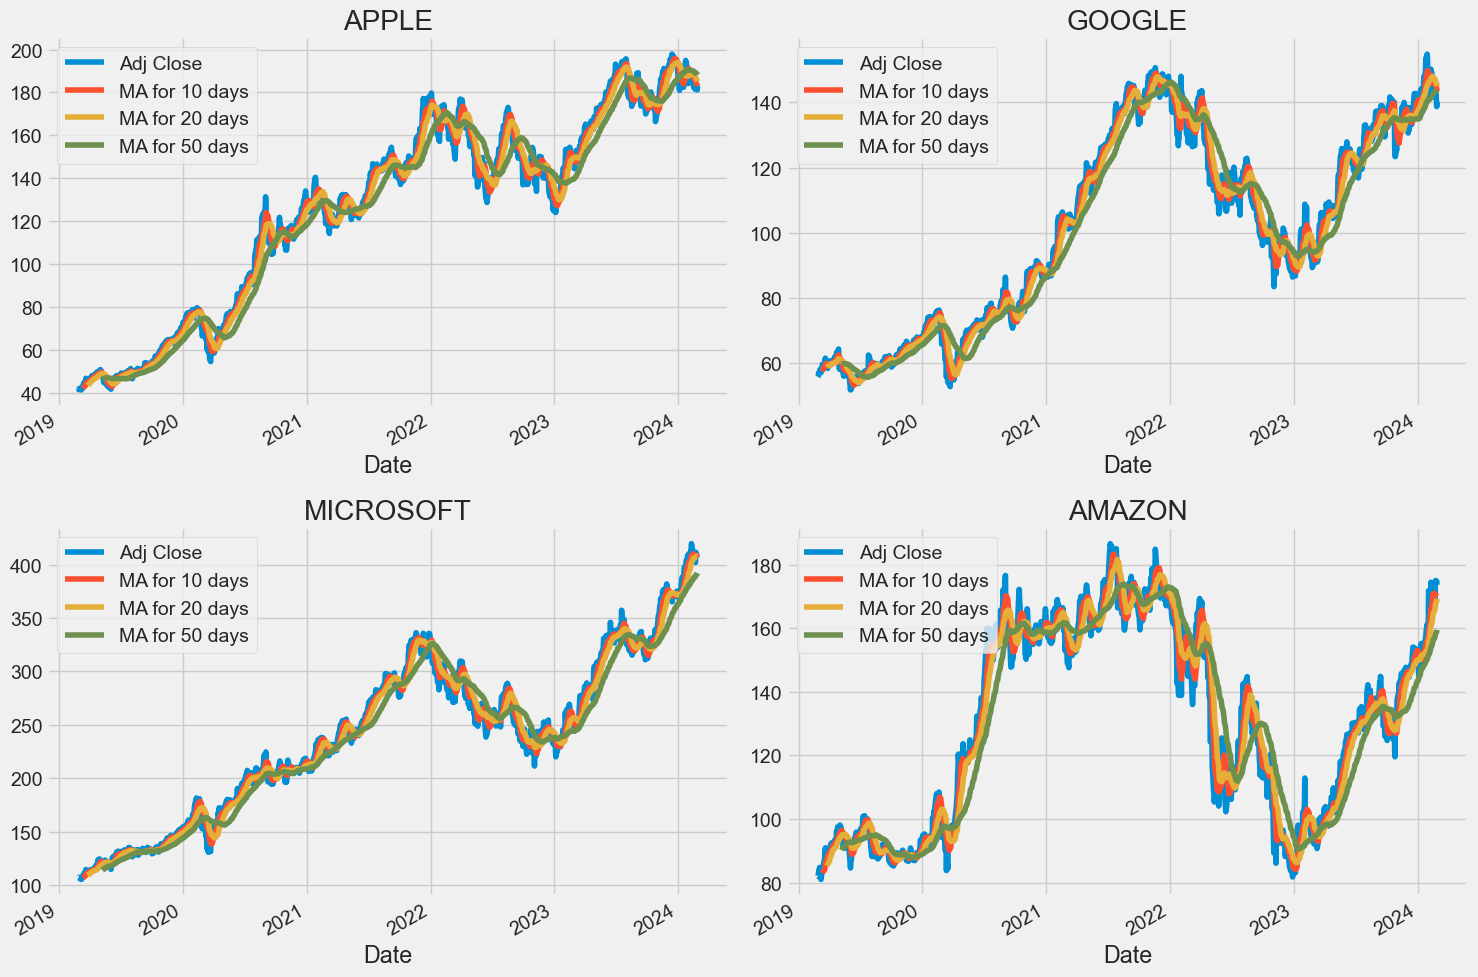

In [38]:
ma_day = [10, 20, 50] # number of days in the window

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# Daily return of the stock on average

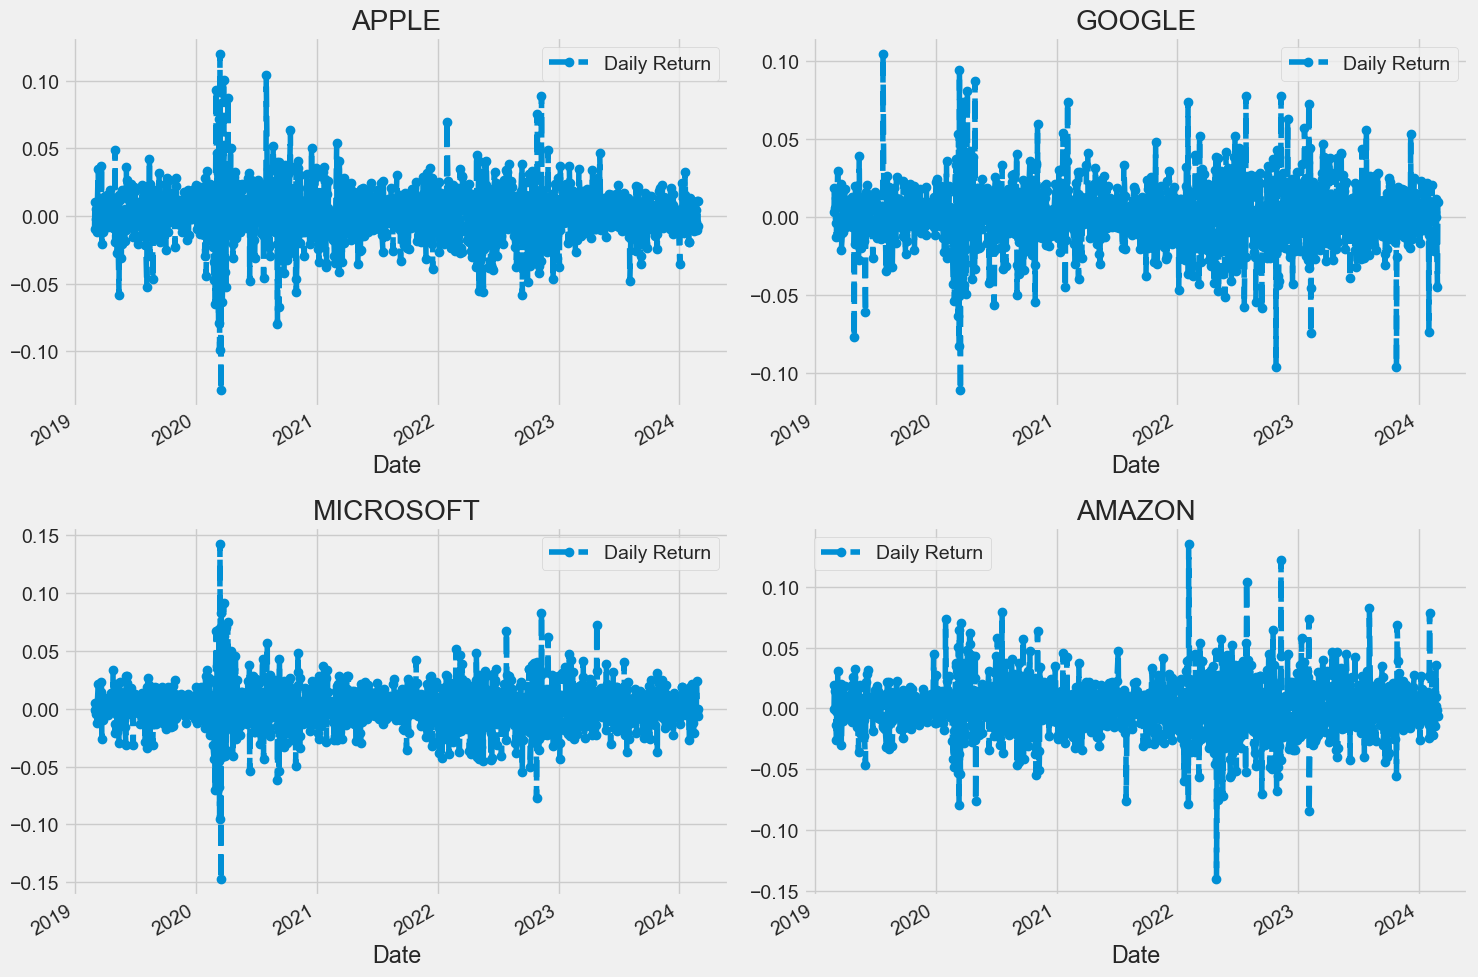

In [39]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# ARIMA 

In [20]:
# Download stock data from Yahoo Finance
df = yf.download('AAPL', start='2014-01-01', end=datetime.now())

# Save DataFrame to Excel
df.to_excel('df_2014_AAPL.xlsx')

[*********************100%%**********************]  1 of 1 completed


In [22]:
# Check the column names in the DataFrame
print(df.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [23]:
import yfinance as yf
from datetime import datetime

# Download stock data from Yahoo Finance
df = yf.download('AAPL', start='2014-01-01', end=datetime.now())

# Create a new DataFrame with only 'Date' and 'Close' columns
df_close = df[['Close']].copy()
df_close.reset_index(inplace=True)

# Save the new DataFrame to Excel
df_close.to_excel('df_2014_AAPL_close.xlsx', index=False)

[*********************100%%**********************]  1 of 1 completed


In [24]:
pd.read_excel('df_2014_AAPL_close.xlsx')

,Date,Close
0,2014-01-02,19.754642
1,2014-01-03,19.320715
2,2014-01-06,19.426071
3,2014-01-07,19.287144
4,2014-01-08,19.409286
...,...,...
2590,2024-04-18,167.039993
2591,2024-04-19,165.000000
2592,2024-04-22,165.839996
2593,2024-04-23,166.899994


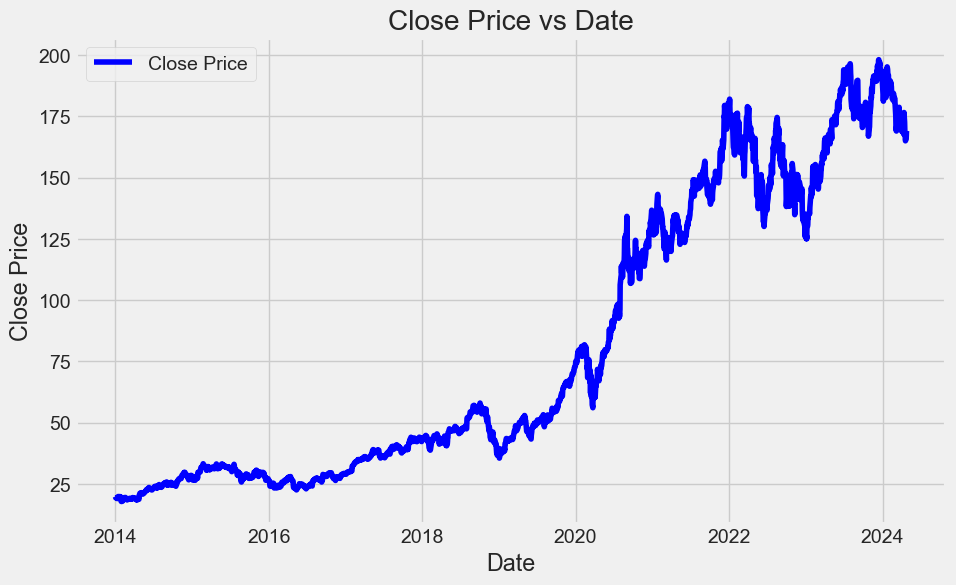

In [29]:
import matplotlib.pyplot as plt

# Assuming df_close is your DataFrame with 'Date' as index and 'Close' as a column
plt.figure(figsize=(10, 6))
plt.plot(df_close.index, df_close['Close'], color='blue', label='Close Price')
plt.title('Close Price vs Date')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

## decompose

In [55]:
import pandas as pd

# Assuming df is your DataFrame with stock data
# Create 'Date' column from the index
df_close['Date'] = df_close.index

# Set 'Date' column as index
df_close.set_index('Date', inplace=True)

# Now, convert the index to datetime format
df_close.index = pd.to_datetime(df.index)

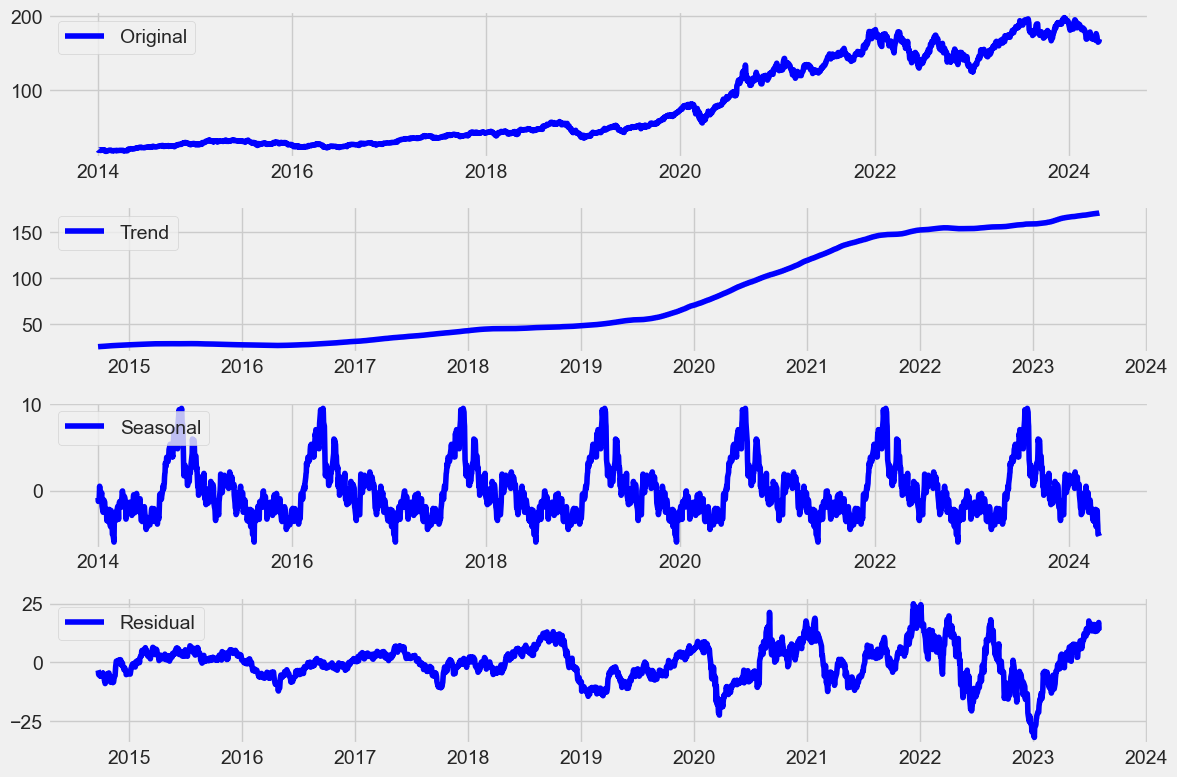

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform time series decomposition
result = seasonal_decompose(df_close['Close'], model='additive', period=365)

# Plot the decomposition
plt.figure(figsize=(12, 8))

# Original Close Prices
plt.subplot(411)
plt.plot(df_close.index, df_close['Close'], label='Original', color="blue")
plt.legend(loc='upper left')

# Trend component
plt.subplot(412)
plt.plot(result.trend, label='Trend', color="blue")
plt.legend(loc='upper left')

# Seasonal component
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color="blue")
plt.legend(loc='upper left')

# Residual component (observed - trend - seasonal)
plt.subplot(414)
plt.plot(result.resid, label='Residual', color="blue")
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

## KPSS test

In [32]:
from statsmodels.tsa.stattools import kpss

# Perform KPSS test
kpss_test_result = kpss(df_close, regression='c', nlags='legacy')

# Print test results
print("KPSS Statistic:", kpss_test_result[0])
print("p-value:", kpss_test_result[1])
print("Lags Used:", kpss_test_result[2])
print("Critical Values:", kpss_test_result[3])

# Interpret the test results
if kpss_test_result[1] < 0.05:
    print("Reject the null hypothesis (non-stationary).")
else:
    print("Fail to reject the null hypothesis (stationary).")

KPSS Statistic: 8.238583990198023
p-value: 0.01
Lags Used: 28
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Reject the null hypothesis (non-stationary).


c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


This warning and output are from performing a KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test on a time series data `tsData`. Here's what each part means:

1. **InterpolationWarning**: This warning indicates that the test statistic is outside the range of p-values available in the look-up table. In other words, the p-value calculated from the test statistic falls below the smallest p-value in the table. This often happens when the test statistic is large, indicating strong evidence against the null hypothesis of stationarity.

2. **KPSS Statistic**: This is the test statistic computed from the KPSS test. It quantifies the deviation of the time series from stationarity. In this case, the value is 8.238583990198023. (It measures how much the time series differs from being stable.)

3. **p-value**: This is the p-value associated with the test statistic. It represents the probability of observing a test statistic as extreme as the one computed if the null hypothesis (that the series is trend stationary) is true. Here, the p-value is 0.01.

4. **Lags Used**: This indicates the number of lags used in the test. In this case, 28 lags are used.

5. **Critical Values**: These are the critical values for different significance levels (10%, 5%, 2.5%, and 1%). They provide thresholds for determining the significance of the test statistic. 

6. **Interpretation**: Since the p-value (0.01) is less than the significance level of 5%, we reject the null hypothesis (non-stationary). This means that the time series `tsData` is likely non-stationary.

In [39]:
df_close.index

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2024-04-11', '2024-04-12', '2024-04-15', '2024-04-16',
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24'],
              dtype='datetime64[ns]', name='Date', length=2595, freq=None)

In [40]:
pd.to_datetime(tsstationary.index)

DatetimeIndex(['2014-01-02', '2014-01-03', '2014-01-06', '2014-01-07',
               '2014-01-08', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-14', '2014-01-15',
               ...
               '2024-04-11', '2024-04-12', '2024-04-15', '2024-04-16',
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-22',
               '2024-04-23', '2024-04-24'],
              dtype='datetime64[ns]', name='Date', length=2595, freq=None)

In [61]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming tsstationary is your DataFrame containing the time series data
# Make sure 'Date' is set as the index and 'Close' is one of the columns

tsstationary = df_close 

# Convert index to DatetimeIndex
tsstationary.index = pd.to_datetime(tsstationary.index)

In [43]:
tsstationary

,Close
Date,
2014-01-02,19.754642
2014-01-03,19.320715
2014-01-06,19.426071
2014-01-07,19.287144
2014-01-08,19.409286
...,...
2024-04-18,167.039993
2024-04-19,165.000000
2024-04-22,165.839996


In [48]:
tsstationary.loc[:, 'Close']

Date
2014-01-02     19.754642
2014-01-03     19.320715
2014-01-06     19.426071
2014-01-07     19.287144
2014-01-08     19.409286
                 ...    
2024-04-18    167.039993
2024-04-19    165.000000
2024-04-22    165.839996
2024-04-23    166.899994
2024-04-24    169.020004
Name: Close, Length: 2595, dtype: float64

In [58]:
# Set the frequency of the DatetimeIndex to 'D' (daily)
tsstationary.index = pd.date_range(start=tsstationary.index.min(), periods=len(tsstationary), freq='D')

# Perform seasonal decomposition
result = seasonal_decompose(tsstationary['Close'], model='additive')


<AxesSubplot:>

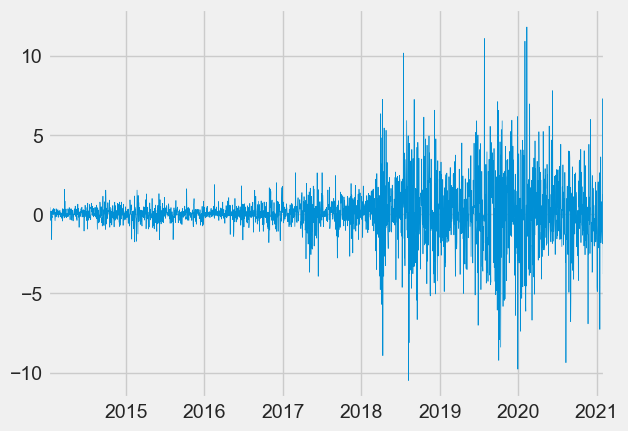

In [59]:
# Remove seasonality
timeseriesseasonallyadjusted = tsstationary['Close'] - result.seasonal

# Take first difference to remove trend
tsstationary = timeseriesseasonallyadjusted.diff(periods=1)

# Plot the resulting time series
tsstationary.plot(linewidth=0.5)

## ACF, PACF

<Figure size 1200x600 with 0 Axes>

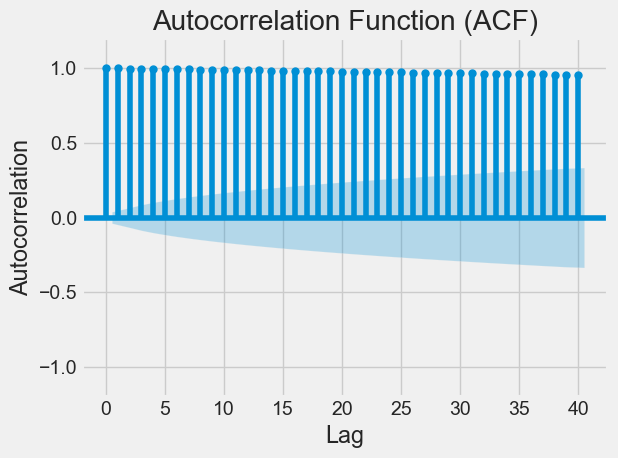

c:\Users\rwang\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

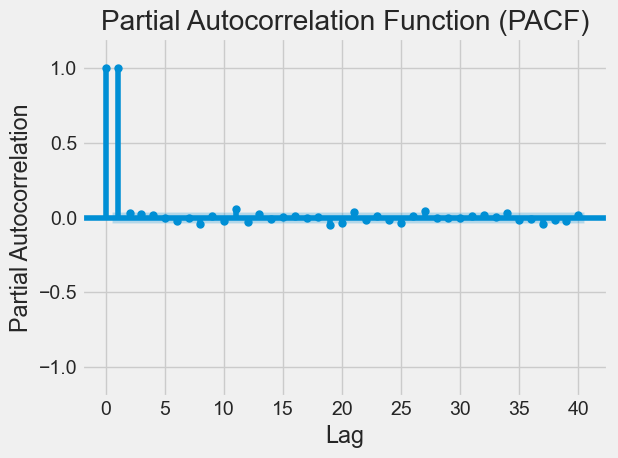

In [68]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the ACF
plt.figure(figsize=(12, 6))
plot_acf(tsstationary['Close'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.ylim(-1.2, 1.2)  # Adjust x-axis limit
plt.tight_layout()  # Adjust layout to prevent cutoff
plt.show()

# Plot the PACF
plt.figure(figsize=(12, 6))
plot_pacf(tsstationary['Close'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.ylim(-1.2, 1.2)  # Adjust x-axis limit
plt.tight_layout()  # Adjust layout to prevent cutoff
plt.show()

(should look like a sin function for ACF)

Autocorrelation values being positive is indeed a common occurrence and is normal in many cases. Autocorrelation measures the correlation between a time series and a lagged version of itself. When the autocorrelation function (ACF) returns positive values, it indicates that there is a positive correlation between the values of the time series at different lags.

Positive autocorrelation suggests that high (or low) values in the time series tend to be followed by high (or low) values at subsequent time points. This pattern is typical in time series data, especially in cases where there is some underlying trend or seasonality.

However, the magnitude and significance of the autocorrelation values depend on the specific characteristics of the time series and the context of the analysis. It's essential to interpret the autocorrelation values in conjunction with other diagnostic tools and domain knowledge to draw meaningful conclusions about the underlying processes driving the time series data.

If you have concerns about the autocorrelation pattern in your data, you may want to consider additional analysis techniques or consult with a subject matter expert to gain a deeper understanding of the underlying dynamics. 

## example

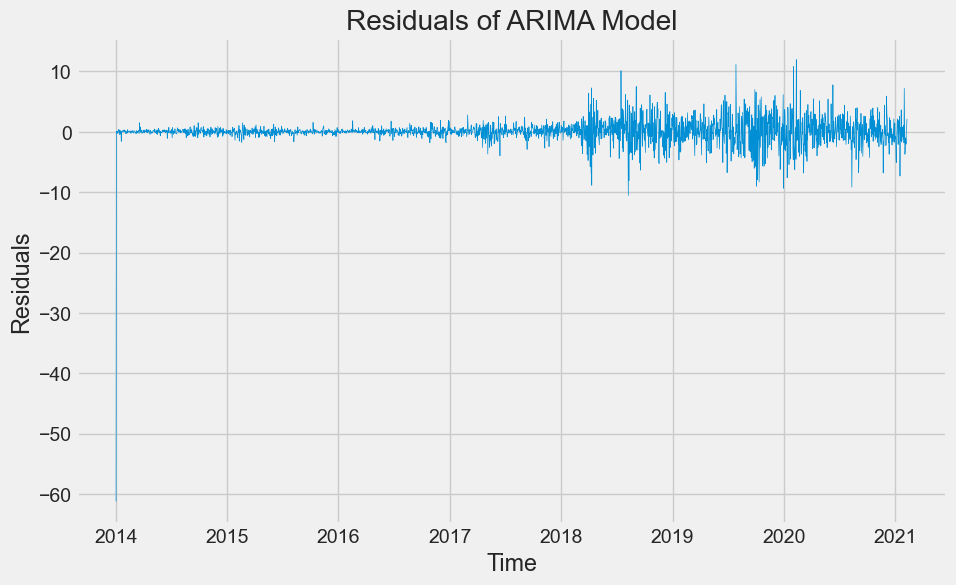

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Assuming tsData is your time series data
# Fit ARIMA model
order = (1, 0, 1)  # Adjust differencing order to 0 since there's no need for additional differencing
seasonal_order = (1, 0, 0, 12)  # Periodic with period=12
fitARIMA = ARIMA(df_close['Close'], order=order, seasonal_order=seasonal_order, trend='c').fit()

# Get residuals
residuals = fitARIMA.resid

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, linewidth=0.5)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## find best fitting

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10285.694, Time=1.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10290.772, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10290.848, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10290.758, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10291.551, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10292.900, Time=0.57 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10292.893, Time=0.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10288.629, Time=2.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10289.562, Time=2.50 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10291.075, Time=0.67 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10285.743, Time=0.74 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10294.734, Time=0.63 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.06 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=10286.820, Time=0.74 sec

Best model:  ARIMA(2,1,2

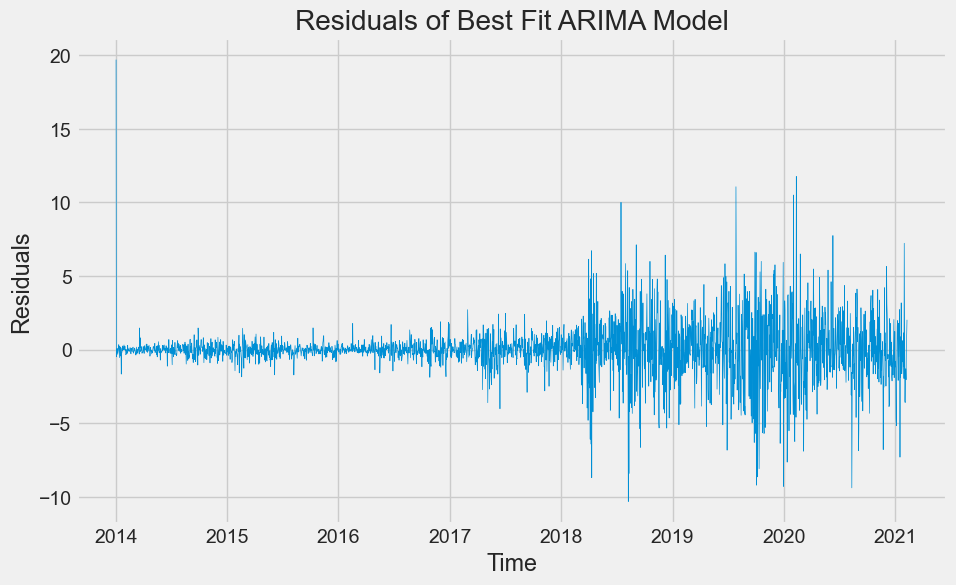

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Assuming tsData is your time series data
# Fit auto ARIMA model
model = auto_arima(df_close['Close'], trace=True)

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(model.resid(), linewidth=0.5)
plt.title('Residuals of Best Fit ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## bare prediction

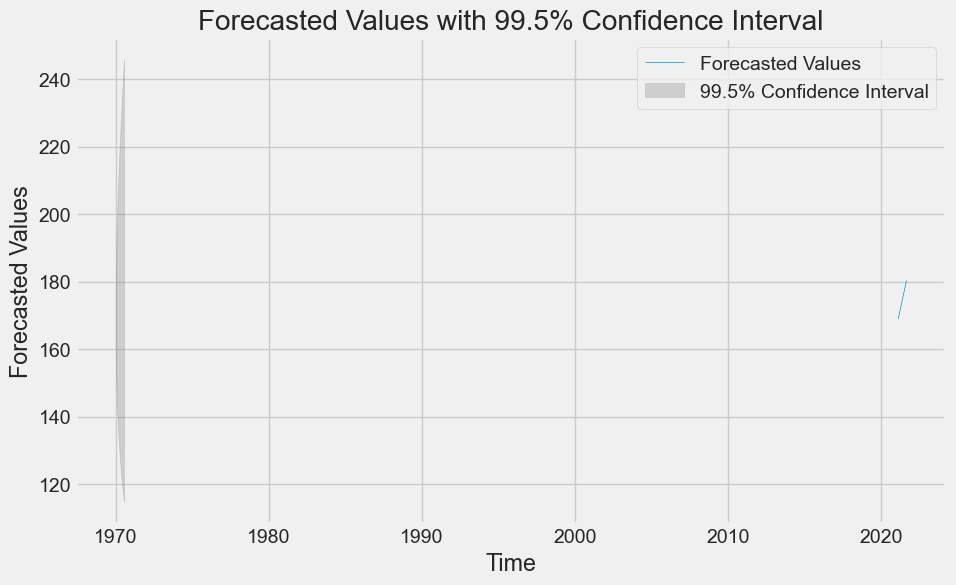

In [76]:
# Assuming model is your fitted ARIMA model
# Forecast
forecast_values = model.predict(n_periods=200, return_conf_int=True, alpha=0.005)

# Plot forecasted values
plt.figure(figsize=(10, 6))
plt.plot(forecast_values[0], label='Forecasted Values', linewidth=0.5)
plt.fill_between(np.arange(len(forecast_values[0])), forecast_values[1][:, 0], forecast_values[1][:, 1], color='gray', alpha=0.3, label='99.5% Confidence Interval')
plt.title('Forecasted Values with 99.5% Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Forecasted Values')
plt.legend()
plt.grid(True)
plt.show()

The phrase "Forecasted Values with 99.5% Confidence Interval" refers to the information presented in the plot. Let's break it down:

- **Forecasted Values**: These are the predicted values for the time series data for the specified forecast horizon. In the context of time series analysis, forecasting involves predicting future values based on historical data and the fitted model. The plot displays these forecasted values over time.

- **99.5% Confidence Interval**: In statistics, a confidence interval is a range of values that is likely to contain the true population parameter with a certain level of confidence. The 99.5% confidence interval indicates that, based on the forecast, there is a 99.5% probability that the true value of each forecasted data point lies within the interval defined by the upper and lower bounds shown in the plot. This interval provides a measure of uncertainty around the forecasted values, helping assess the reliability of the predictions.

## sampling & prediction

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Train-test split
train_size = int(len(df_close) * 0.8)  # 80% train, 20% test
train_data = df_close.iloc[:train_size]
test_data = df_close.iloc[train_size:]

# Record the start time
start_time = datetime.now()

# Fit auto ARIMA model
model = auto_arima(df_close['Close'], trace=True)

# Record the end time
end_time = datetime.now()

# Print the chosen order
print(f"Chosen Order: {model.order}")

# Making and fitting the model
arima = SARIMAX(train_data['Close'].values, order=model.order).fit(maxiter=200)

# Record the end time
end_time = datetime.now()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10285.694, Time=1.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10290.772, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10290.848, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10290.758, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10291.551, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10292.900, Time=0.60 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10292.893, Time=0.64 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=10288.629, Time=2.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=10289.562, Time=2.48 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10291.075, Time=0.69 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=10285.743, Time=0.77 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=10294.734, Time=0.62 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.13 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=10286.820, Time=0.70 sec

Best model:  ARIMA(2,1,2

In [101]:
# Make predictions for the training data
predictions_train = arima.fittedvalues

# Adjust the indices for aligning predictions with training data
index = train_data.index[5:]

# Trim the predictions array to match the length of the index
predictions_train = predictions_train[:len(index)]

# Create a Pandas Series from the trimmed predictions array
predictions_train = pd.Series(predictions_train, index=index)


The sampling done here is not related to data sampling but rather aligning predictions with the training data. In time series forecasting, predictions are made for each observation in the training data, and often these predictions need to be aligned with the original time series data for evaluation or further analysis.

Here's what each part of the code does:

1. `predictions_train = arima.fittedvalues`: This line generates predictions for the training data using the ARIMA model.

2. `index = train_data.index[5:]`: This line retrieves the indices of the training data, starting from the 6th index. This is likely done to align the predictions with the original training data, considering that the ARIMA model may not generate predictions for the initial few observations due to the requirement of historical data for making forecasts.

3. `predictions_train = predictions_train[:len(index)]`: This line trims the predictions array to match the length of the index, ensuring that the predictions align properly with the training data.

4. `predictions_train = pd.Series(predictions_train, index=index)`: Finally, this line creates a Pandas Series from the trimmed predictions array, using the index obtained earlier. This Series contains the aligned predictions, ready for further analysis or evaluation. 

This process is different from non-time-series data because in time series data, the order and timing of observations matter. When making predictions with time series models like ARIMA, it's essential to ensure that the predictions align correctly with the original time series data for meaningful analysis and evaluation.

In [102]:
# Calculate MSE for the training data
mse_train = mean_squared_error(train_data['Close'].iloc[5:], predictions_train)

# Print evaluation metrics for the training data
print(f"Training Data:")
print(f"Mean Squared Error: {mse_train:.4f}")
print(f"Time taken for training: {end_time - start_time}")
plt.show()

Training Data:
Mean Squared Error: 11.0169
Time taken for training: 0:08:03.632542


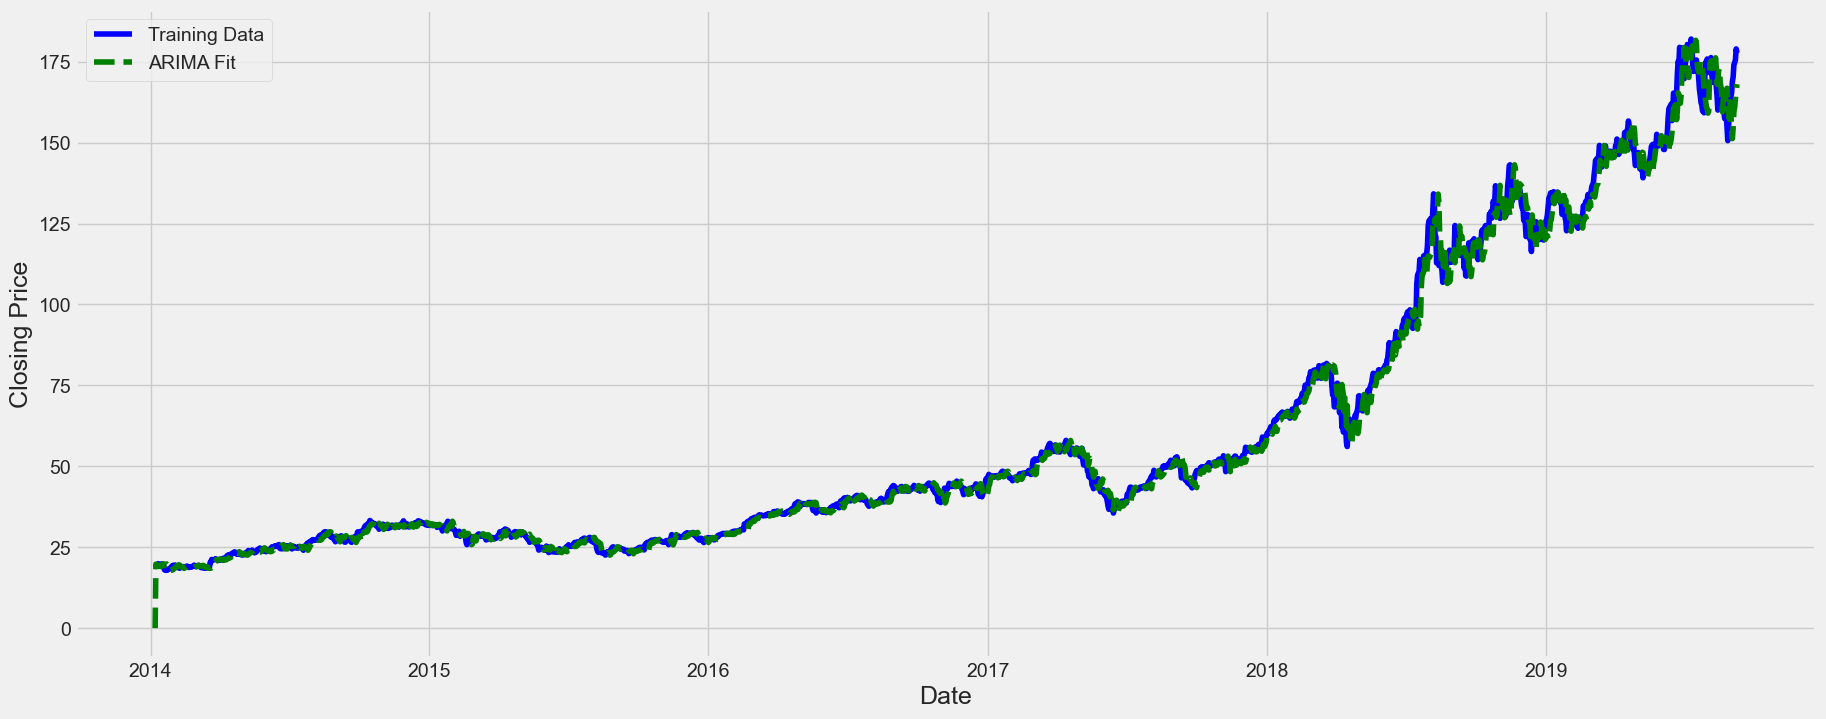

In [103]:
plt.figure(figsize=(20, 8))
plt.plot(train_data.index[5:], train_data['Close'].iloc[5:], 'b', label="Training Data")
plt.plot(train_data.index[5:], predictions_train, 'g--', label="ARIMA Fit")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Closing Price", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14, loc="upper left")
plt.show()

In [104]:
# Make predictions for the test data
predictions_test = arima.forecast(len(test_data))

# Calculate MSE for the test data
mse_test = mean_squared_error(test_data['Close'], predictions_test)

# Print evaluation metrics for the test data
print(f"\nTest Data:")
print(f"Mean Squared Error: {mse_test:.4f}")


Test Data:
Mean Squared Error: 497.4575
